In [1]:
import matplotlib.pyplot as plt
import os, sys
import netCDF4
import MCGO_Analysis
import numpy as np

In [2]:
mcgo_nc_file = '/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/MCGO/run29d_dt0/NSTX_FOW_RF_NBIreinj_run29d_dt0014_reinj100ms_promptIncluded_ivlim30.nc'
eqdsk_file = '/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/MCGO/run29d_dt0/eqdsk_t217ms'

# create the pp object

mcgo_pp = MCGO_Analysis.MCGO_Post_Process(mcgo_nc_file=mcgo_nc_file, eqdsk_file=eqdsk_file)


['  500  500\n']


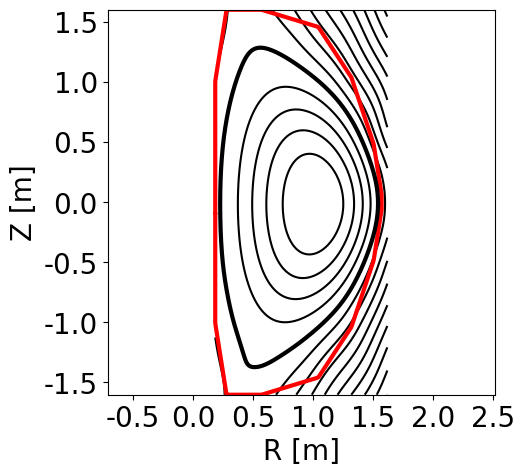

In [3]:
mcgo_pp.plot_equilibrium(figsize=(5,5), levels=15)

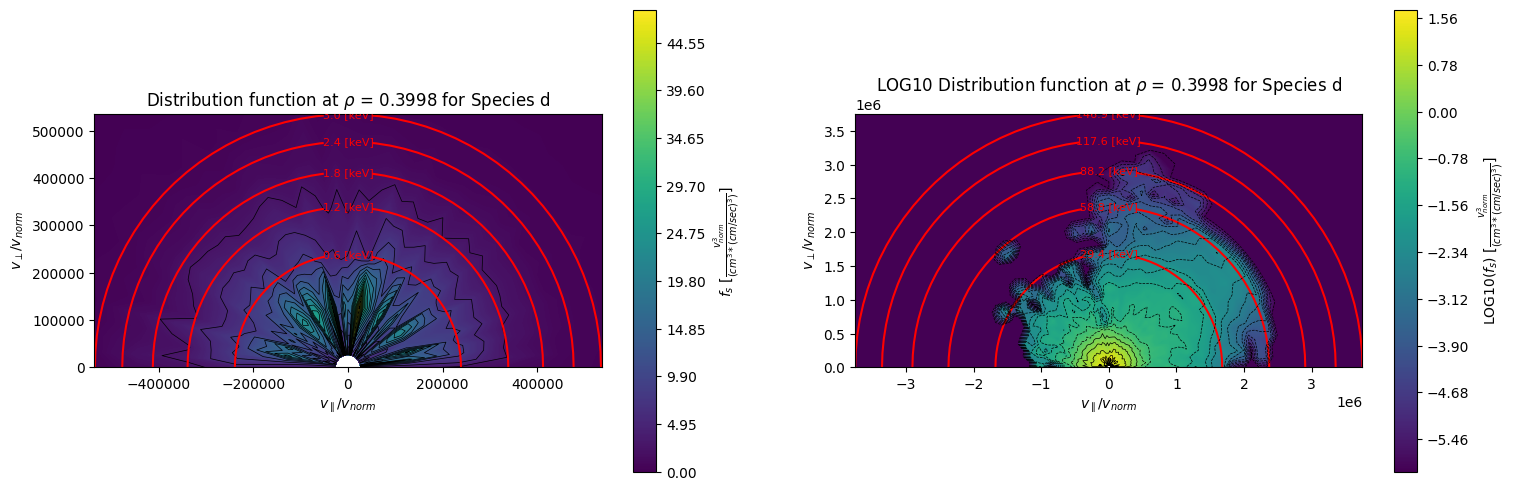

In [8]:
# try out plotting
rho_idx = 8
mcgo_pp.plot_distribution_function_at_rho(
        rho_index=rho_idx,
        v_norm_over_v_max=0.1,
        log_scale_axis_multiple=7,
        log_clip_level=1e-6,
        figsize=(18, 6),
        cmap="viridis",
        num_energy_levels=6,
        energy_levels_linear=None,
        energy_levels_log=None,
        energy_color="red",
        return_plot=False,
        use_interpolated_rho=False,
        rho_to_interpolate_to=None,
        plot_trapped_passing=False)

In [5]:
# testing TODO delete once implimented into the class
mcgo_nc = netCDF4.Dataset(mcgo_nc_file, "r")


In [6]:
print(mcgo_nc.variables.keys())
c = 3e8 # m/s
pitch_angle_grid = mcgo_nc.variables['ptchbnd'][:]
velocity_grid =  mcgo_nc.variables['vbnd'][:]
vdstb = mcgo_nc.variables['vdstb'][:]
# print(pitch_angle_grid)
print(velocity_grid)

cosy=np.asmatrix(np.cos(pitch_angle_grid)) #make a matrix (1,iptchbnd) {not same as vector}
#cosy=cosy.transpose()          # transpose to (iptchbnd,1) shape
siny=np.asmatrix(np.sin(pitch_angle_grid)) #make a matrix (1,iptchbnd) {not same as vector}
#siny=siny.transpose()          # transpose to (iptchbnd,1) shape
xx=np.asmatrix(velocity_grid).T # make a matrix (1,ivbnd)   [m/s]
# X=np.dot(cosy,xx)    # (iptchbnd,ivbnd) matrix
# Y=np.dot(siny,xx)    # (iptchbnd,ivbnd) matrix
X=np.dot(xx, cosy)    # (iptchbnd,ivbnd) matrix
Y=np.dot(xx, siny)    # (iptchbnd,ivbnd) matrix
r_index = 8


fdist= vdstb[r_index,:,:]#.transpose()

fdistlog10 = np.log10(np.clip(fdist, 1e-6, None))
#fdistlog10 = np.nan_to_num(np.log10(fdist))
print(X.shape)
print(fdistlog10.shape)


dict_keys(['version', 'mnemonic', 'eqdskin', 'raxis', 'zaxis', 'xlimiter', 'ylimiter', 'rcontr', 'zcontr', 'nparts_tot', 'mf', 'rhobincent', 'rps_bincent', 'npol_start', 'irbnd', 'ivbnd', 'iptchbnd', 'ptchbnd', 'vbnd', 'radbnd', 'psibin', 'rho_sqpolflx', 'vdstb', 'rst', 'zst'])
[  25896.354  130507.3    235118.23   339729.2    444340.12   548951.06
  653562.     758172.94   862783.9    967394.8   1072005.8   1176616.8
 1281227.6   1385838.6   1490449.5   1595060.5   1699671.4   1804282.4
 1908893.2   2013504.2   2118115.2   2222726.    2327337.    2431948.
 2536559.    2641170.    2745780.8   2850391.8   2955002.8   3059613.8
 3164224.5   3268835.5   3373446.5   3478057.5   3582668.2   3687279.2
 3791890.2   3896501.2   4001112.    4105723.    4210334.    4314945.
 4419556.    4524167.    4628778.    4733388.5   4837999.5   4942610.5
 5047221.5   5151832.5   5256443.5   5361054.5  ]
(52, 51)
(52, 51)


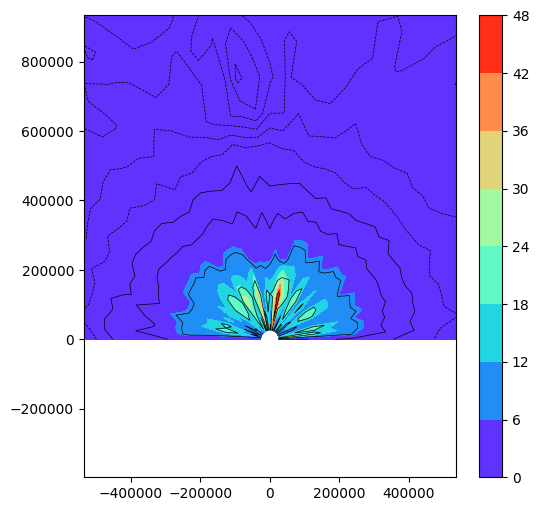

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
cf = ax.contourf(X,Y,fdist, cmap='rainbow')
ax.contour(X,Y,fdistlog10, levels=20, colors='black', linewidths=0.5)
lim = 0.1*np.max(velocity_grid)
ax.axis('equal')
ax.set_xlim(-lim, lim)
ax.set_ylim(0, lim)
fig.colorbar(cf)

